In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
X = pd.read_csv("LR Data/linearX.csv").values
y = pd.read_csv("LR Data/linearY.csv").values

In [10]:
X.shape

(99, 1)

In [11]:
y.shape

(99, 1)

In [21]:
mu = X.mean()
sig = X.std()
X_norm = ( X - mu ) / sig

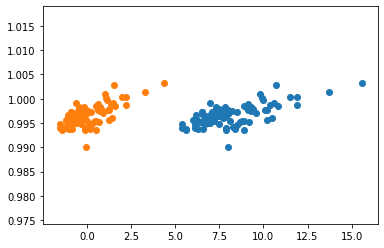

In [22]:
plt.scatter(X, y)
plt.scatter(X_norm, y)
plt.show()

# Linear Regression

In [34]:
def hypothesis(x, theta):
    """
    theta : list of theta0 and theta1
    x : input value (scalar)
    """
    
    return theta[0] + theta[1]*x

In [35]:
def error(X, y, theta):
    """
    X : Dataset (99,1)
    y : (99,1)
    theta : (2,)
    """
    
    m = X.shape[0]
    total_err = 0.
    
    for i in range(m):
        y_ = hypothesis(X[i], theta)
        total_err += (y_ - y[i])**2
    
    return float(total_err/m)

In [42]:
def gradient(X, y, theta ):
    """
    X : (99,1)
    y : (99,1)
    theta : (2,)
    """
    m = X.shape[0]
    grad = np.zeros(2)
    
    for i in range(m):
        y_ = hypothesis(X[i], theta)
        
        grad[0] += (y_ - y[i])
        grad[1] += (y_ - y[i])*X[i]
        
    return grad/m

In [76]:
def gradient_descent(X, y, lr =0.1, max_itr = 100 ):

    m = X.shape[0]
    
    theta = np.zeros(2)
    
    losses = []
    
    for i in range(max_itr):
        
        e = error(X, y, theta)
        
        losses.append(e)
        
        grad = gradient(X, y, theta)
        
        theta[0] = theta[0] - lr*grad[0]
        theta[1] = theta[1] - lr*grad[1]
    
    return theta, losses

In [77]:
Theta, Losses =  gradient_descent(X_norm, y)

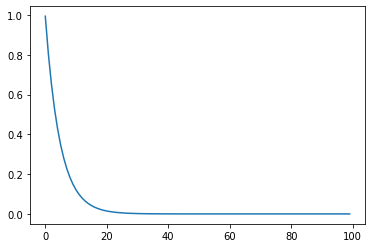

In [78]:
plt.plot(Losses)
plt.show()

In [79]:
Theta

array([0.99660767, 0.0013579 ])

## Test Dataset

In [87]:
x_test = np.array([-3,4,5])

In [88]:
y_pred = hypothesis(x_test, Theta)

In [90]:
y_pred

array([0.99253396, 1.00203928, 1.00339719])

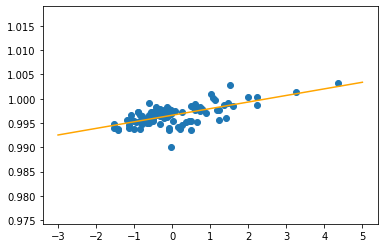

In [89]:
plt.scatter(X_norm, y)
plt.plot(x_test, y_pred, color="orange")
plt.show()

In [93]:
Theta

array([0.99660767, 0.0013579 ])

# Sklearn

In [94]:
from sklearn.linear_model import LinearRegression

In [99]:
lin_reg = LinearRegression()
lin_reg.fit(X_norm, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [100]:
lin_reg.coef_

array([[0.00135794]])

In [101]:
lin_reg.intercept_

array([0.99663414])

In [109]:
x_test.shape

(3,)

In [108]:
lin_reg.predict(x_test.reshape((-1,1)))

array([[0.99256032],
       [1.0020659 ],
       [1.00342384]])

# Different Models in SKlearn

In [110]:
from sklearn.svm import SVR

In [111]:
model = SVR()
model.fit(X_norm, y)

/Users/mohituniyal/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)